In [1]:
# from datasets import load_dataset

# # Tải PhoATIS
# dataset = load_dataset("tridm/PhoATIS")

In [2]:
import pandas as pd
import os
import glob

folder_path = "./dataset"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
all_dataframes = []

for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8-sig')  # hoặc 'utf-8' nếu bị lỗi
    df['Label'] = os.path.basename(file)[:-4]  # thêm cột tên file
    all_dataframes.append(df)
# Gộp tất cả các DataFrame thành 1
dataset = pd.concat(all_dataframes, ignore_index=True)

In [3]:
dataset

,Text,Label
0,Hey Cuộc sống của bạn ra sao !,chat
1,Ơi Bạn đã ăn chưa nhen?,chat
2,Hello Bạn làm nghề gì bạn ơi?,chat
3,Hi Cuộc sống của bạn ra sao ?,chat
4,Ê Bạn có thích âm nhạc không đấy!,chat
...,...,...
6318,Ê Dự báo mưa cho ngày mai bạn ơi?,weather_questions
6319,Nè Thời tiết cuối tuần này thế nào thân mến?,weather_questions
6320,Có gió lớn không bạn à?,weather_questions
6321,Ơi Có gió lớn không !,weather_questions


In [35]:
dataset.to_csv("dataset.csv", index=False, encoding='utf-8-sig')

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

d:\PTIT\Thuc tap chuyen sau\SmartHomeBot\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Chuyển đổi dữ liệu từ DatasetDict thành pandas DataFrame
from sklearn.model_selection import train_test_split

df, temp_df = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['Label'])

validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['Label'])

# df = df.head(100)
print(validation_df.head())
print(test_df.head())


                                      Text               Label
2395                      Nè Mày ơi bạn ơi            greeting
4025    Hello Đóng quạt phòng tắm thân mến  smart_home_control
2347  Hello Hello Chào bạn! Duy bạn à đấy!            greeting
5833           Nè Có nắng nhiều không nha?   weather_questions
520       Hi Hôm nay bạn bận không bạn ơi?                chat
                                              Text          Label
4464                   Hi Bạn biết mấy giờ không !     time_query
4372                        Hello Mấy giờ rồi đấy!     time_query
957                  Này Tối nay đi chơi không đó!           chat
1074           Điều hòa có hoạt động không bạn ơi?  device_status
3225  Tôi muốn bật nhạc thư giãn trong phòng khách   help_request


In [6]:
df2 = df.copy()
df2.head()

,Text,Label
485,Này Tối nay đi chơi không !,chat
36,Ê Bạn đã ăn chưa ?,chat
5687,Hey Thời tiết cuối tuần này thế nào nhen?,weather_questions
4756,Này Lịch trình ngày mai bắt đầu lúc mấy giờ bạ...,time_query
2970,Ê Duy nhé,greeting


In [7]:
def print_shape_df(df, ds_name="df"):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
print_shape_df(df, "Chatbot")

Chatbot dataset has 5058 rows and 2 columns


In [8]:
def print_dfInfo(df, ds_name="df"):
    print(f"The info of {ds_name} dataset\n")
    print(df.info())
    
print_dfInfo(df, "Chatbot")

The info of Chatbot dataset

<class 'pandas.core.frame.DataFrame'>
Index: 5058 entries, 485 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5058 non-null   object
 1   Label   5058 non-null   object
dtypes: object(2)
memory usage: 118.5+ KB
None


In [9]:
def num_classes(df, target_col, ds_name="df"):
    print(f"The {ds_name} dataset has {len(df[target_col].unique())} classes")
    
num_classes(dataset, 'Label', "Chatbot")

The Chatbot dataset has 13 classes


In [10]:
def check_null(df, ds_name='df'):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())
    
check_null(df, "Chatbot")

Null Values in each col in the Chatbot dataset:

Text     0
Label    0
dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11928\1998123925.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)


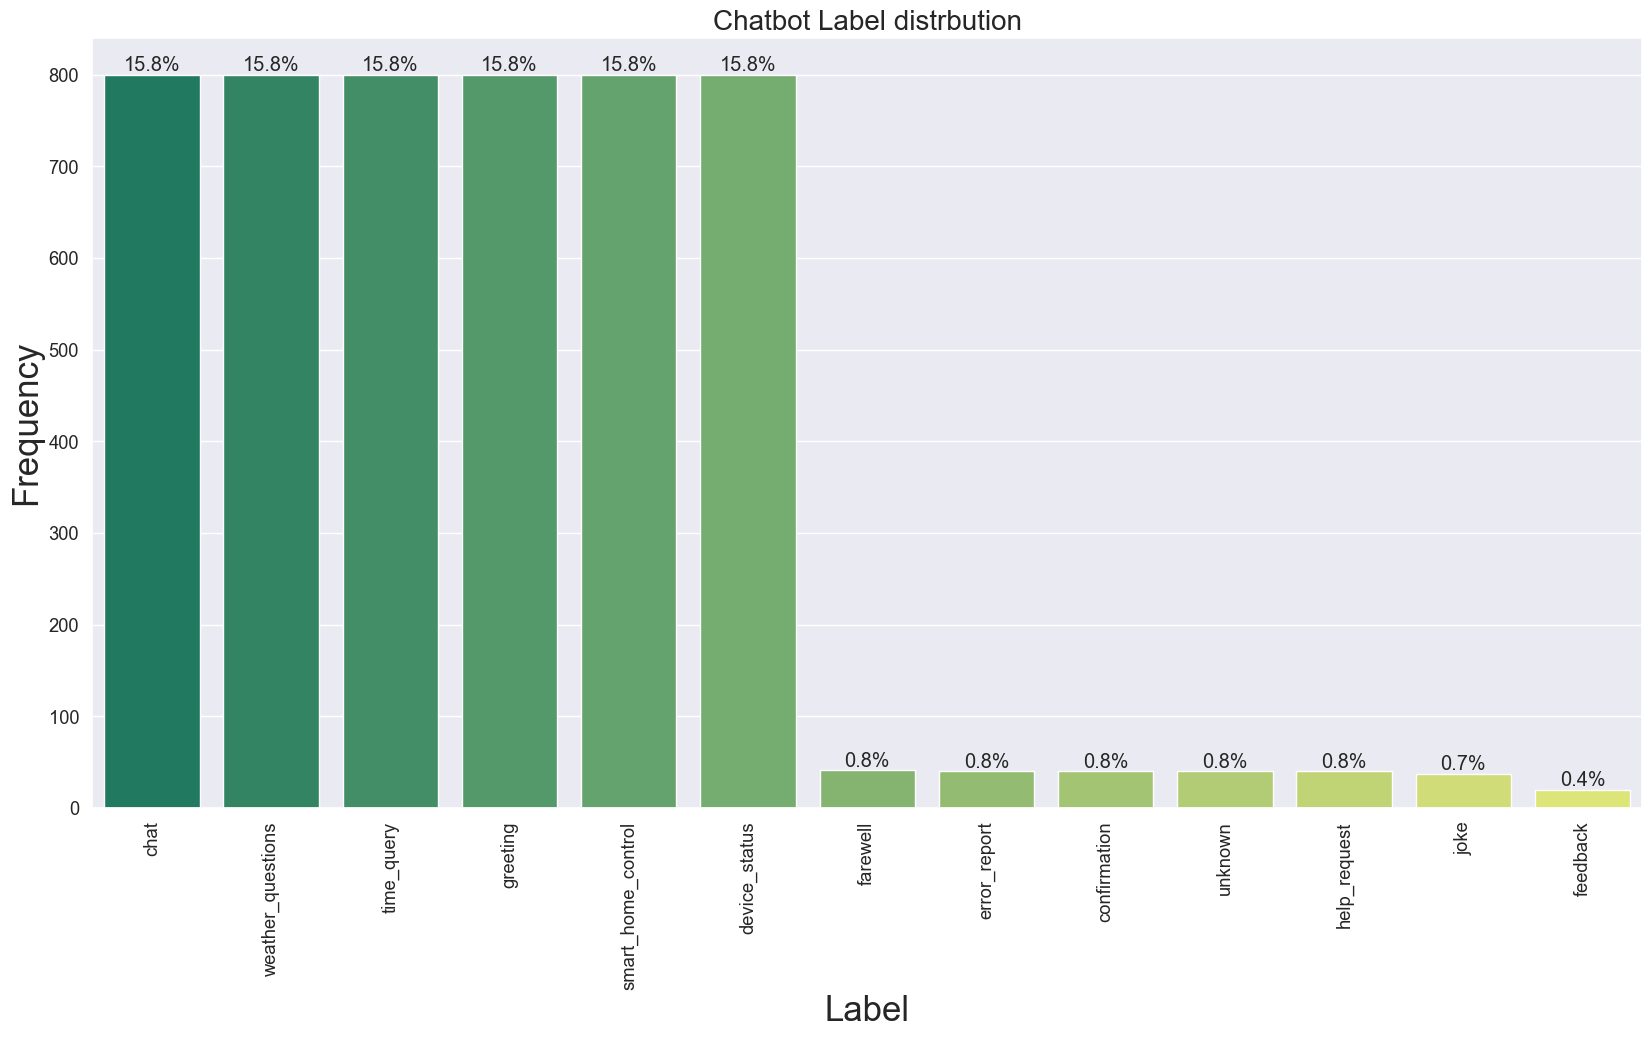

In [12]:
sns.set(font_scale = 1.2)
order = df['Label'].value_counts().index
count_plot(df['Label'], df, "Chatbot Label distrbution", "Label", "Frequency", 20,10, order=order,rotation=True, palette="summer")


In [13]:
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
ignore_words=['?', '!', ',', '.']

def preprocess_pattern(pattern):
    words = word_tokenize(pattern.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in ignore_words]
    return " ".join(stemmed_words)  

df['Text'] = df['Text'].apply(preprocess_pattern)

In [14]:
df.head()

,Text,Label
485,nài tối nay đi chơi không,chat
36,ê bạn đã ăn chưa,chat
5687,hey thời tiết cuối tuần nài thế nào nhen,weather_questions
4756,nài lịch trình ngài mai bắt đầu lúc mấi giờ bạ...,time_query
2970,ê duy nhé,greeting


In [15]:
print(df['Text'].isnull().sum())

0


In [16]:
df2.head()

,Text,Label
485,Này Tối nay đi chơi không !,chat
36,Ê Bạn đã ăn chưa ?,chat
5687,Hey Thời tiết cuối tuần này thế nào nhen?,weather_questions
4756,Này Lịch trình ngày mai bắt đầu lúc mấy giờ bạ...,time_query
2970,Ê Duy nhé,greeting


In [17]:
labels = df2['Label'].unique().tolist()
labels = [s.strip() for s in labels]
labels

['chat',
 'weather_questions',
 'time_query',
 'greeting',
 'smart_home_control',
 'device_status',
 'confirmation',
 'error_report',
 'unknown',
 'farewell',
 'joke',
 'feedback',
 'help_request']

In [18]:
num_labels = len(labels)
id2label = {id:label for id, label in enumerate(labels)}
label2id = {label:id for id, label in enumerate(labels)}

In [19]:
id2label

{0: 'chat',
 1: 'weather_questions',
 2: 'time_query',
 3: 'greeting',
 4: 'smart_home_control',
 5: 'device_status',
 6: 'confirmation',
 7: 'error_report',
 8: 'unknown',
 9: 'farewell',
 10: 'joke',
 11: 'feedback',
 12: 'help_request'}

In [20]:
label2id

{'chat': 0,
 'weather_questions': 1,
 'time_query': 2,
 'greeting': 3,
 'smart_home_control': 4,
 'device_status': 5,
 'confirmation': 6,
 'error_report': 7,
 'unknown': 8,
 'farewell': 9,
 'joke': 10,
 'feedback': 11,
 'help_request': 12}

In [21]:
df2['labels'] = df2['Label'].map(lambda x: label2id[x.strip()])
df2.head()

,Text,Label,labels
485,Này Tối nay đi chơi không !,chat,0
36,Ê Bạn đã ăn chưa ?,chat,0
5687,Hey Thời tiết cuối tuần này thế nào nhen?,weather_questions,1
4756,Này Lịch trình ngày mai bắt đầu lúc mấy giờ bạ...,time_query,2
2970,Ê Duy nhé,greeting,3


In [22]:
X = list(df2['Text'])
X[:5]

['Này Tối nay đi chơi không !',
 'Ê Bạn đã ăn chưa ?',
 'Hey Thời tiết cuối tuần này thế nào nhen?',
 'Này Lịch trình ngày mai bắt đầu lúc mấy giờ bạn ơi?',
 'Ê Duy nhé']

In [23]:
y = list(df2['labels'])
y[:5]

[0, 0, 1, 2, 3]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 123)

In [25]:
from transformers import PhobertTokenizer, RobertaForSequenceClassification

model_name = "vinai/phobert-base"
max_len = 256

tokenizer = PhobertTokenizer.from_pretrained(model_name, 
                                          max_length=max_len)

model = RobertaForSequenceClassification.from_pretrained(model_name, 
                                                      num_labels=num_labels, 
                                                      id2label=id2label, 
                                                      label2id = label2id)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [27]:
full_data = tokenizer(X, truncation=True, padding=True)

In [28]:
import torch
from torch.utils.data import Dataset

class DataLoader(Dataset):
    
    def __init__(self, encodings, labels):
        
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
               
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):

        return len(self.labels)

In [29]:
train_dataloader = DataLoader(train_encoding, y_train)
test_dataloader = DataLoader(test_encoding, y_test)

In [30]:
fullDataLoader = DataLoader(full_data, y_test)

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):

    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [32]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='./output', 
    do_train=True,
    do_eval=True,
    num_train_epochs=100,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=16,
    warmup_steps=100,                
    weight_decay=0.05,
    logging_strategy='steps',
    logging_dir='./multi-class-logs',            
    logging_steps=50,
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps", 
    load_best_model_at_end=True
)

In [33]:
trainer = Trainer(
    model=model,
    args=training_args,                 
    train_dataset=train_dataloader,         
    eval_dataset=test_dataloader,            
    compute_metrics= compute_metrics
)

In [34]:
trainer.train()

d:\PTIT\Thuc tap chuyen sau\SmartHomeBot\.venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.208400,1.527091,0.780237,0.369068,0.368140,0.388602
100,0.794500,0.281464,0.939130,0.490056,0.511968,0.491124
150,0.153300,0.121719,0.966008,0.657408,0.635944,0.698478
200,0.089500,0.091342,0.984190,0.833358,0.826617,0.848271
250,0.066800,0.051916,0.991304,0.909795,0.963087,0.904223


d:\PTIT\Thuc tap chuyen sau\SmartHomeBot\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\PTIT\Thuc tap chuyen sau\SmartHomeBot\.venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
d:\PTIT\Thuc tap chuyen sau\SmartHomeBot\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\PTIT\Thuc tap chuyen sau\SmartHomeBot\.venv\lib\site-packages\torc

KeyboardInterrupt: 

In [ ]:
q=[trainer.evaluate(eval_dataset=df2) for df2 in [train_dataloader, test_dataloader]]

pd.DataFrame(q, index=["train","test"]).iloc[:,:5]

In [ ]:
def predict(text):
    
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)
    pred_label_idx = probs.argmax()
    pred_label = model.config.id2label[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [ ]:
text = "Hello"
predict(text)

In [ ]:
model_path = "chatbot"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizerFast
from transformers import pipeline

model_path = "/kaggle/working/chatbot"


model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
chatbot= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)